In [1]:
import pytraj as pt
import mdtraj as md
import numpy as np
import pandas as pd
from openbabel import pybel
from tempfile import NamedTemporaryFile
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import prolif
%load_ext autoreload
%autoreload 2

# PDBQT

In [2]:
lig = prolif.Ligand.from_pdbqt("/data/backup/cicada/cbouysset/workspace/bitter/old.t2r16/docking/output/5JQH/T2R16_HUMAN.B99990041/ligand_001/docking_poses.pdbqt")
rec = Chem.MolFromPDBFile("/nfs/jeroboam/cedric/bitter/t2r16/structures/5JQH/T2R16_HUMAN.B99990041.pdb", removeHs=False)
rec = prolif.Protein.from_rdkit(rec, reference=lig)
ff = prolif.FingerprintFactory()
print(ff.interactions.keys())
ff.rules

odict_keys(['HBdonor', 'HBacceptor', 'Cation', 'Anion', 'PiStacking', 'Hydrophobic'])


{'HBond': {'donor': '[O,N,S]-[H]',
  'acceptor': '[O,N,F,*-;!+]',
  'distance': 3.0,
  'angle': [0.0, 0.8726646259971648]},
 'XBond': {'donor': '[#6,#7,Si,F,Cl,Br,I][F,Cl,Br,I,At]',
  'acceptor': '[F-,Cl-,Br-,I-,#7,O,P,S,Se,Te,a&R;!+][*]',
  'distance': 3.2,
  'angle': {'AXD': [2.792526803190927, 3.141592653589793],
   'XAR': [1.5707963267948966, 2.2689280275926285]}},
 'Ionic': {'cation': '[*+]', 'anion': '[*-]', 'distance': 5.0},
 'Aromatic': {'smarts': ['[a]1:[a]:[a]:[a]:[a]:[a]:1',
   '[a]1:[a]:[a]:[a]:[a]:1'],
  'FaceToFace': {'angle': [0.0, 0.5235987755982988], 'distance': 4.4},
  'EdgeToFace': {'angle': [1.0471975511965976, 1.5707963267948966],
   'distance': 5.5}},
 'Cation-Pi': {'distance': 5.0, 'angle': [0.0, 0.5235987755982988]},
 'Hydrophobic': {'smarts': '[#6,S,F,Cl,Br,I;!+;!-]', 'distance': 4.5},
 'Metallic': {'metal': '[Ca,Cd,Co,Cu,Fe,Mg,Mn,Ni,Zn]',
  'ligand': '[O,N,*-;!+]',
  'distance': 2.8}}

In [3]:
df = prolif.Dataframe()
df.configure(ff)
df.generate_ifp(lig.get_frame(), rec.get_frame())
df.curate()
df

Ligand name Ligand frame Ligand residue Protein name Protein frame   ASN89  \
                                                                     HBdonor   
0  trajectory            0           UNL0      protein             0       0   

                                      ... VAL265                               \
  HBacceptor Cation Anion PiStacking  ... Cation Anion PiStacking Hydrophobic   
0          0      0     0          0  ...      0     0          0           1   

   TYR266                                                 
  HBdonor HBacceptor Cation Anion PiStacking Hydrophobic  
0       0          0      0     0          0           1  

[1 rows x 107 columns]

In [19]:
df.get_residue("ASN89")

,Ligand name,Ligand frame,Ligand residue,Protein name,Protein frame,HBdonor,HBacceptor,Cation,Anion,PiStacking,Hydrophobic
0,trajectory,0,UNL0,protein,0,0,0,0,0,0,1


In [17]:
df.get_interaction("Hydrophobic")

,Ligand name,Ligand frame,Ligand residue,Protein name,Protein frame,ASN89,ILE90,PHE93,LYS169,GLU171,...,ALA180,HIS181,PHE240,ILE243,LEU244,ILE247,GLU262,ALA263,VAL265,TYR266
0,trajectory,0,UNL0,protein,0,1,1,1,0,1,...,1,0,1,1,1,1,1,0,1,1


# Topology tests

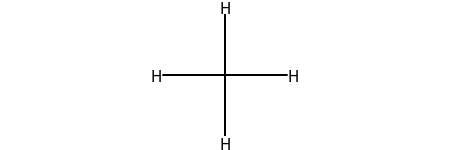

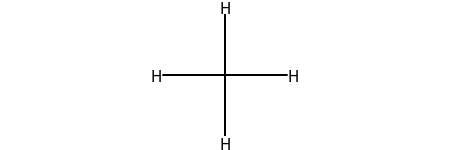

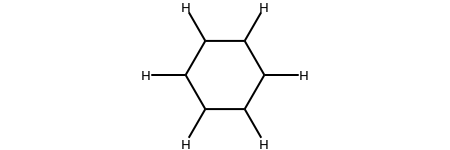

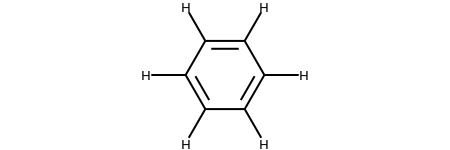

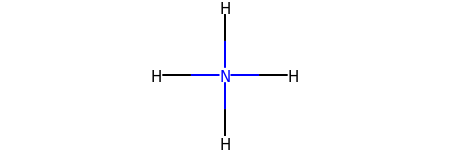

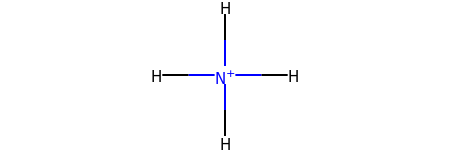

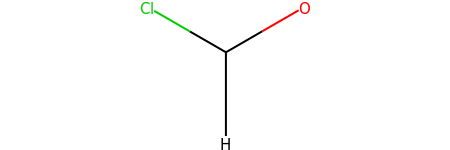

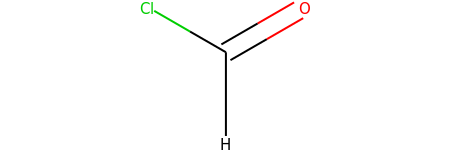

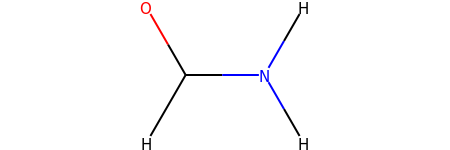

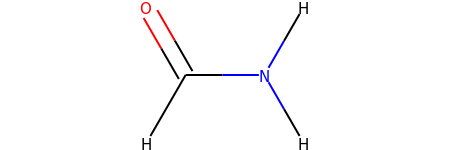

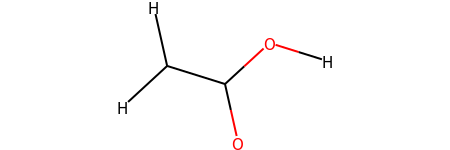

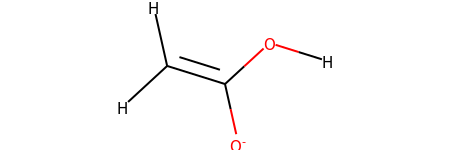

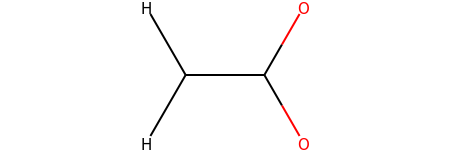

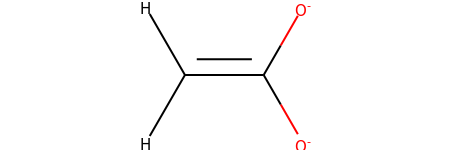

RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 161 in file /opt/conda/conda-bld/rdkit_1561471048963/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_explicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [12:50:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 161 in file /opt/conda/conda-bld/rdkit_1561471048963/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_explicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [12:50:22] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 161 in file /opt/conda/conda-bld/rdkit_1561471048963/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_expl

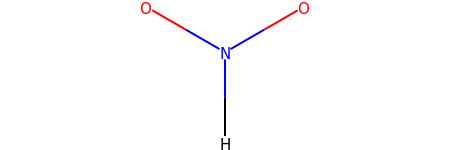

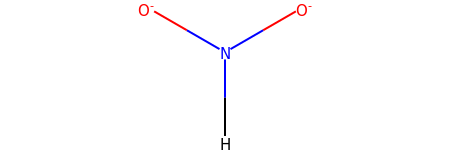

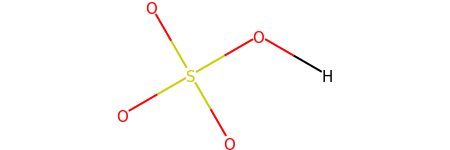

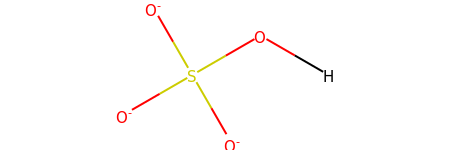

In [100]:
tests = [
    "[C](-[H])(-[H])(-[H])-[H]",
    "[C]1(-[H])-[C](-[H])-[C](-[H])-[C](-[H])-[C](-[H])-[C]1(-[H])",
    "[N](-[H])(-[H])(-[H])-[H]",
    "[Cl]-[C](-[H])-[O]",
    "[H]-[C](-[O])-[N](-[H])-[H]",
    "[H]-[C](-[H])-[C](-[O][H])-[O]",
    "[H]-[C](-[H])-[C](-[O])-[O]",
    "[O]-[N](-[O])-[H]",
    "[O]-[S](-[O])(-[O])-[O]-[H]"
]
for s in tests:
    mol = Chem.RWMol(Chem.MolFromSmiles(s, sanitize=False))
    display(mol)
    prolif.utils.update_bonds_and_charges(mol)
    display(mol)